<h2 style="color: #F93633; font-family: 'Georgia', serif; font-size: 28px; text-align: center;">Loading libraries</h2>

In [25]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder
import warnings
import json
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

<h2 style="color: #853633; font-family: 'Georgia', serif; font-size: 28px; text-align: center;">Data Pre-Processing</h2>

In [26]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [27]:
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [28]:
# Define Numeric, Categorical, features
numeric_feats = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
nominal_feats = ['ST slope', 'resting ecg', 'chest pain type']
binary_feats = ['sex', 'fasting blood sugar', 'exercise angina', 'target']

In [29]:

# Convert Numeric features to proper Dtype and put into discrete bins then binarize
df['age'] = df['age'].astype('int')
df['resting bp s'] = df['resting bp s'].astype('int')
df['max heart rate'] = df['max heart rate'].astype('int')
df['cholesterol'] = df['cholesterol'].astype('int')
df['oldpeak'] = df['oldpeak'].astype('float')
# Apply KBinsDiscretizer
est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
df[numeric_feats] = est.fit_transform(df[numeric_feats])

In [30]:
# Convert bin indices to readable labels
for i, feature in enumerate(numeric_feats):
    bin_edges = est.bin_edges_[i]
    labels = [f"{bin_edges[j]:.2f}-{bin_edges[j+1]:.2f}" for j in range(len(bin_edges)-1)]
    
    # map the ordinal values back to labels
    df[feature] = df[feature].map(lambda x: labels[int(x)] if not pd.isnull(x) else None)

In [31]:
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [32]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,37.80-42.70,1,2,140.00-160.00,241.20-301.50,0,0,159.40-173.60,0,-0.84-0.04,1,0
1,47.60-52.50,0,3,160.00-180.00,120.60-180.90,0,0,145.20-159.40,0,0.92-1.80,2,1
2,32.90-37.80,1,2,120.00-140.00,241.20-301.50,0,1,88.40-102.60,0,-0.84-0.04,1,0
3,47.60-52.50,0,4,120.00-140.00,180.90-241.20,0,0,102.60-116.80,1,0.92-1.80,2,1
4,52.50-57.40,1,3,140.00-160.00,180.90-241.20,0,0,116.80-131.00,0,-0.84-0.04,1,0


In [33]:
# Uncode the binary features for analysis
sex_var =  {'sex':{0:'female',1:'male'}}
fasting_blood_sugar_var = {'fasting blood sugar': {0:'false', 1:'true'}}
exercise_angina_var = {'exercise angina': {0:'no',1:'yes'}}
class_var = {'target': {1:'heart disease', 0:'Normal'}}

# Recode the binary features for use
df = df.replace(sex_var)
df = df.replace(fasting_blood_sugar_var)
df = df.replace(exercise_angina_var)
df = df.replace(class_var)

In [34]:
df['chest pain type'].value_counts()

4    625
3    283
2    216
1     66
Name: chest pain type, dtype: int64

In [35]:
# Convert nominal_feats into categories then binarize them
chest_pain_type_var = {'chest pain type':{1:'typical angina', 2:'atypical angina', 3:'non-anginal pain',4:'asymptomatic'}}
resting_ecg_var = {'resting ecg': {0:'normal', 1:'having ST-T wave abnormality', 2:'probable or definite left ventricular hypertrophy'}}
ST_slope_var = {'ST slope':{1:'upsloping', 2:'flat', 3:'downsloping'}}

# Change the values back to string equivalent and convert to object
df = df.replace(chest_pain_type_var)
df = df.replace(resting_ecg_var)
df = df.replace(ST_slope_var)

In [36]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,37.80-42.70,male,atypical angina,140.00-160.00,241.20-301.50,false,normal,159.40-173.60,no,-0.84-0.04,upsloping,Normal
1,47.60-52.50,female,non-anginal pain,160.00-180.00,120.60-180.90,false,normal,145.20-159.40,no,0.92-1.80,flat,heart disease
2,32.90-37.80,male,atypical angina,120.00-140.00,241.20-301.50,false,having ST-T wave abnormality,88.40-102.60,no,-0.84-0.04,upsloping,Normal
3,47.60-52.50,female,asymptomatic,120.00-140.00,180.90-241.20,false,normal,102.60-116.80,yes,0.92-1.80,flat,heart disease
4,52.50-57.40,male,non-anginal pain,140.00-160.00,180.90-241.20,false,normal,116.80-131.00,no,-0.84-0.04,upsloping,Normal


In [37]:
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [38]:
df = df.astype(str)

In [39]:
encoder = OneHotEncoder(sparse=False)  # sparse=False ensures the output is a dense array
encoded=encoder.fit_transform(df)

In [40]:
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(df.columns))


In [41]:
encoded_df

,age_28.00-32.90,age_32.90-37.80,age_37.80-42.70,age_42.70-47.60,age_47.60-52.50,age_52.50-57.40,age_57.40-62.30,age_62.30-67.20,age_67.20-72.10,age_72.10-77.00,...,oldpeak_2.68-3.56,oldpeak_3.56-4.44,oldpeak_4.44-5.32,oldpeak_5.32-6.20,ST slope_0,ST slope_downsloping,ST slope_flat,ST slope_upsloping,target_Normal,target_heart disease
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1187,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1188,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [42]:
freq=fpgrowth(encoded_df,min_support=0.20,use_colnames=True)
# print(freq)

In [43]:
rules=association_rules(freq,metric="confidence",min_threshold=0.65)
# rules

In [44]:
filtered_rules = rules[rules['consequents'].apply(lambda x: 'target_heart disease' in str(x))]


In [45]:
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
186,(ST slope_flat),(target_heart disease),0.489076,0.528571,0.385714,0.788660,1.492059,0.127203,2.230662,0.645468
192,"(ST slope_flat, sex_male)",(target_heart disease),0.394958,0.528571,0.341176,0.863830,1.634273,0.132413,3.462054,0.641455
193,(ST slope_flat),"(target_heart disease, sex_male)",0.489076,0.469748,0.341176,0.697595,1.485040,0.111434,1.753447,0.639268
195,"(fasting blood sugar_false, ST slope_flat)",(target_heart disease),0.370588,0.528571,0.276471,0.746032,1.411411,0.080588,1.856250,0.463114
201,"(fasting blood sugar_false, ST slope_flat, sex...",(target_heart disease),0.287395,0.528571,0.242857,0.845029,1.598704,0.090948,3.042049,0.525527
204,"(fasting blood sugar_false, ST slope_flat)","(target_heart disease, sex_male)",0.370588,0.469748,0.242857,0.655329,1.395065,0.068774,1.538429,0.449924
206,"(resting ecg_normal, ST slope_flat)",(target_heart disease),0.265546,0.528571,0.213445,0.803797,1.520698,0.073085,2.402765,0.466207
210,"(chest pain type_asymptomatic, ST slope_flat)",(target_heart disease),0.328571,0.528571,0.291597,0.887468,1.678994,0.117923,4.189286,0.602305
217,"(chest pain type_asymptomatic, fasting blood s...",(target_heart disease),0.245378,0.528571,0.208403,0.849315,1.606812,0.078703,3.128571,0.500449
225,"(chest pain type_asymptomatic, ST slope_flat, ...",(target_heart disease),0.273950,0.528571,0.255462,0.932515,1.764218,0.110660,6.985714,0.596621


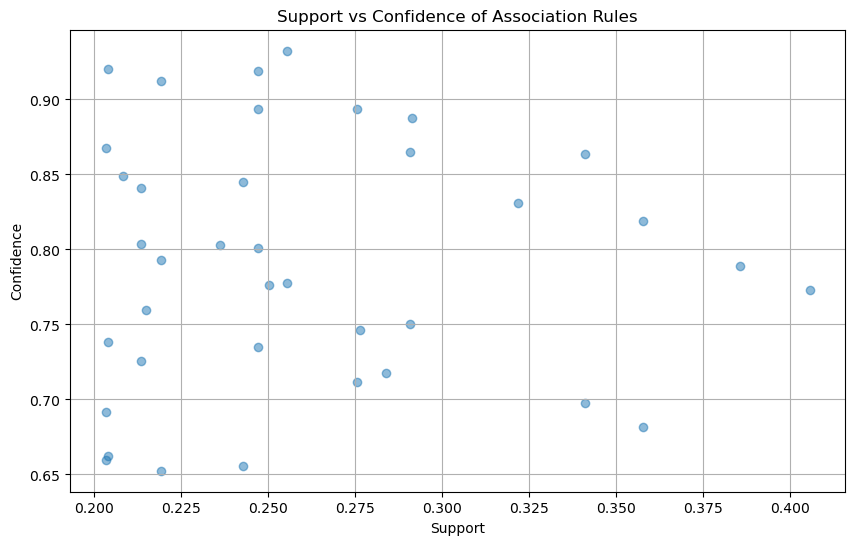

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_rules['support'], filtered_rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence of Association Rules')
plt.grid(True)
plt.show()

In [47]:
rules_dict = filtered_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].apply(lambda x: {
    "antecedent": list(x['antecedents']),
    "consequent": list(x['consequents']),
    "support": x['support'],
    "confidence": x['confidence'],
    "lift": x['lift']
}, axis=1).tolist()

In [48]:
# Save the rules to a JSON file
with open('heart_association_rules.json', 'w') as file:
    json.dump(rules_dict, file)

# Make Predection from user Input

In [49]:
import json

# Load the association rules from the JSON file
with open('heart_association_rules.json', 'r') as file:
    association_rules = json.load(file)

# Function to take user input
def get_user_input():
    user_input = {
        'age': input("Enter age: "),
        'sex': input("Enter sex (male/female): "),
        'chest pain type': input("Enter chest pain type (typical angina, atypical angina, non-anginal pain, asymptomatic): "),
        'cholesterol': input("Enter cholesterol level: "),
        'exercise angina': input("Exercise-induced angina? (yes/no): "),
        'ST slope': input("Enter ST slope (upsloping, flat, downsloping): ")
    }
    return user_input

# Pre-process user input (you might need to discretize age and cholesterol)
def preprocess_input(user_input):
    # Map strings to the one-hot encoded format
    processed_input = {
        'age': user_input['age'],  # discretize as needed
        'sex': f"sex_{user_input['sex']}",
        'chest pain type': f"chest pain type_{user_input['chest pain type']}",
        'exercise angina': f"exercise angina_{user_input['exercise angina']}",
        'ST slope': f"ST slope_{user_input['ST slope']}"
    }
    return processed_input

# Predict using association rules
def predict_disease(user_input, association_rules):
    for rule in association_rules:
        antecedents = rule['antecedent']
        if all(feature in user_input.values() for feature in antecedents):
            return f"Prediction: {rule['consequent']} with confidence: {rule['confidence']} and lift: {rule['lift']}"
    return "No significant indicators of heart disease were found based on the provided input."

# Main program flow
user_input = get_user_input()
processed_input = preprocess_input(user_input)
prediction = predict_disease(processed_input, association_rules)
print(prediction)


Prediction: ['target_heart disease'] with confidence: 0.7886597938144331 and lift: 1.492059069378657
